In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
df = pd.read_csv('cleaned_dataset_v1.csv')

In [4]:
df.sample(3)

,PROP_ID,PREFERENCE,DESCRIPTION,PROPERTY_TYPE,CITY,BEDROOM_NUM,PRICE_PER_UNIT_AREA,FURNISH,FACING,AGE,TOTAL_FLOOR,FEATURES,PROP_NAME,MAP_DETAILS,AMENITIES,AREA,PRICE,PROP_HEADING,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS,SOCIETY_NAME,BUILDING_NAME,location,BALCONY_NUM,FLOOR_NUM
1640,B71238916,S,Make Saket Nagar your next home. This project ...,Residential Apartment,Kolkata North,3.00,4500.00,Unfurnished,0,6,6.00,N,Saket Nagar,"{'LATITUDE': '22.649895', 'LONGITUDE': '88.379...",NaN,1156-1462 sq.ft.,52.02 - 65.79 L,3 BHK Flat in Dunlop,"['READY TO MOVE', 'NEW BOOKING']",13.00,"[{'category': 'MetroStation', 'text': '1 Metro...",Saket Nagar,Saket Nagar,"{'CITY': '26', 'CITY_NAME': 'Kolkata North', '...",NaN,1
787,T71257952,S,Experience a new style of living with Merlin S...,Residential Apartment,Kolkata North,2.00,8759.00,Unfurnished,0,5,28.00,N,Merlin Serenia,"{'LATITUDE': '22.610332', 'LONGITUDE': '88.376...",NaN,732 sq.ft.,64.12 L,2 BHK Flat in BT Road,"['UNDER CONSTRUCTION', 'NEW LAUNCH', 'NEW BOOK...",3.00,"[{'category': 'Connectivity', 'text': '2 Conne...",Merlin Serenia,Merlin Serenia,"{'CITY': '26', 'CITY_NAME': 'Kolkata North', '...",NaN,1
8627,R70924544,S,Located in the popular residential address of ...,Residential Apartment,Kolkata East,4.00,13333.00,Fully furnished,7,1,29.00,"33,12,23,24,46,47,25,26,17,19,1,2,3,5,6,9,40,4...",Tata Avenida,"{'LATITUDE': '22.5811785', 'LONGITUDE': '88.49...","17,2,5,20,21,23,24,46,47,19,1,6,9,40,41,33,12,...",2400 sq.ft.,3.2 Cr,4 BHK Flat in New Town,"['READY TO MOVE', 'RESALE', 'RERA | HIRA']",15.00,"[{'category': 'Shopping', 'text': '2 Shoppings...",Tata Avenida,Tata Avenida,"{'CITY': '28', 'CITY_NAME': 'Kolkata East', 'L...",3.00,25


## Column Descriptions:

1. **PROP_ID**: A unique identifier for each property listing, in the form of an object or string.
2. **PREFERENCE**: Indicates the preference type for the property listing (e.g., "S" for sale, "R" for rent, "P" for pendin means yet to decideg).
3. **DESCRIPTION**: A description of the property listing.
4. **PROPERTY_TYPE**: The type of the property (e.g., "Residential Apartment").
5. **CITY**: The city where the property is located.
6. **TRANSACT_TYPE**: The transaction type.
7. **OWNTYPE**: An integer representing the ownership type.
8. **BEDROOM_NUM**: The number of bedrooms in the property.
9. **PRICE_PER_UNIT_AREA**: The price per unit area of the property.
10. **FURNISH**: Indicates whether the property is furnished.
11. **FACING**: Indicates the direction the property is facing.
12. **AGE**: The age of the property in years.
13. **TOTAL_FLOOR**: The total number of floors in the building.
14. **FEATURES**: Describes the features of the property.
15. **PROP_NAME**: The name of the property.
16. **PRICE_SQFT**: The price per square foot of the property.
17. **MAP_DETAILS**: Contains latitude and longitude information.
18. **AMENITIES**: Describes the amenities available with the property.
19. **AREA**: The area of the property.
20. **PRICE**: The price of the property. This is the target column for ML.
21. **PROP_HEADING**: A heading or title for the property.
22. **SECONDARY_TAGS**: Secondary tags or labels.
23. **TOTAL_LANDMARK_COUNT**: The total number of landmarks near the property.
24. **FORMATTED_LANDMARK_DETAILS**: Details of nearby landmarks.
25. **SOCIETY_NAME**: The name of the society or community.
26. **BUILDING_NAME**: The name of the building.
27. **location**: Additional location information.
28. **BALCONY_NUM**: The number of balconies in the property.
29. **FLOOR_NUM**: The floor number of the property.
30. **CARPET_SQFT**: The total carpet area of the property in square feet.
31. **SUPERBUILTUP_SQFT**: The total super built-up area of the property in square feet.
32. **BUILTUP_SQFT**: The total built-up area of the property in square feet.
33. **SUPER_AREA**: The total super area of the property in square feet.
34. **SUPERAREA_UNIT**: The unit of measurement for the super area.
35. **SUPER_SQFT**: The total super area of the property in square feet.
 verified.
- **xid**: An identifier or key associated with the property listing.
ting is verified.
xid: An identifier or key associated with the property listing.

In [5]:
df['PREFERENCE'].replace({'S': 'Sale', 'R': 'Rent', 'P': 'Pending'}, inplace=True)

In [6]:
df.sample(2)

,PROP_ID,PREFERENCE,DESCRIPTION,PROPERTY_TYPE,CITY,BEDROOM_NUM,PRICE_PER_UNIT_AREA,FURNISH,FACING,AGE,TOTAL_FLOOR,FEATURES,PROP_NAME,MAP_DETAILS,AMENITIES,AREA,PRICE,PROP_HEADING,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS,SOCIETY_NAME,BUILDING_NAME,location,BALCONY_NUM,FLOOR_NUM
5367,K70459732,Sale,Check out this 3 bhk builder floor in new town...,Independent/Builder Floor,Kolkata East,3.00,4960.00,Fully furnished,6,1,4.00,"23,40,41",NaN,"{'LATITUDE': '22.613068', 'LONGITUDE': '88.510...","23,40,41",1250 sq.ft.,62 L,3 BHK Independent Builder Floor in Action Area 2B,"['READY TO MOVE', 'RESALE']",12.00,"[{'category': 'ReligiousPlace', 'text': '9 Rel...",NaN,NaN,"{'CITY': '28', 'CITY_NAME': 'Kolkata East', 'L...",2.00,3
865,Q71075688,Sale,"Siddha Suburbia is a ready to move project, of...",Residential Apartment,Kolkata South,3.00,4884.00,Unfurnished,0,6,14.00,N,Siddha Suburbia,"{'LATITUDE': '22.384982', 'LONGITUDE': '88.4186'}",NaN,1210-1290 sq.ft.,59.1 - 63 L,3 BHK Flat in Baruipur,"['READY TO MOVE', 'NEW BOOKING', 'RERA | HIRA']",8.00,"[{'category': 'MetroStation', 'text': '1 Metro...",Siddha Suburbia,Siddha Suburbia,"{'CITY': '27', 'CITY_NAME': 'Kolkata South', '...",NaN,1


In [7]:
df[df['PREFERENCE'] == 'Pending']

,PROP_ID,PREFERENCE,DESCRIPTION,PROPERTY_TYPE,CITY,BEDROOM_NUM,PRICE_PER_UNIT_AREA,FURNISH,FACING,AGE,TOTAL_FLOOR,FEATURES,PROP_NAME,MAP_DETAILS,AMENITIES,AREA,PRICE,PROP_HEADING,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS,SOCIETY_NAME,BUILDING_NAME,location,BALCONY_NUM,FLOOR_NUM
11,N68751922,Pending,A luxurious pg accommodation is available in t...,Residential Apartment,Kolkata Central,4.00,7.00,Semi-furnished,5,3,10.00,"44,23,24,25,47,17,39,6,9,40,30,41,42,31,21,32",Ganga Jamuna Apartment,"{'LATITUDE': '22.54391', 'LONGITUDE': '88.3554...","17,21,32,44,23,24,47,39,6,9,40,30,41,42,25,31,...",1500 sq.ft.,"11,000/Bed",4 BHK Flat in Shakespeare Sarani,"['FURNISHED', 'SHARED BY 3']",50.00,"[{'category': 'ReligiousPlace', 'text': '1 Rel...",Ganga Jamuna Apartment,Ganga Jamuna Apartment,"{'CITY': '30', 'CITY_NAME': 'Kolkata Central',...",1.00,4
24,T65632192,Pending,Property description designed to suit ones lif...,Residential Apartment,Kolkata East,4.00,7.00,Semi-furnished,0,3,4.00,N,Bhariravi apartment,"{'LATITUDE': '22.581047', 'LONGITUDE': '88.462...","105,103",1300 sq.ft.,"10,000/Bed",4 BHK Flat in Action Area 1,"['FURNISHED', 'SHARED BY 2']",41.00,"[{'category': 'MetroStation', 'text': '2 Metro...",Bhariravi apartment,Bhariravi apartment,"{'CITY': '28', 'CITY_NAME': 'Kolkata East', 'L...",3.00,2
25,S70478774,Pending,Pg only for working ladies and girl students.\...,Residential Apartment,Kolkata North,3.00,5.00,Luxury furnished,3,2,4.00,"24,17,19,9,40,41,42,21,32",Vijay Lakshmi Apartments,"{'LATITUDE': '22.650056', 'LONGITUDE': '88.441...","17,21,32,24,19,9,40,41,42,103",1200 sq.ft.,"6,000/Bedroom",3 BHK Flat in Dum Dum,['PRIVATE ROOM'],24.00,"[{'category': 'ReligiousPlace', 'text': '1 Rel...",Vijay Lakshmi Apartments,Vijay Lakshmi Apartments,"{'CITY': '26', 'CITY_NAME': 'Kolkata North', '...",1.00,3
38,A69153106,Pending,Well maintained & secured pg/paying guest in k...,Independent/Builder Floor,Kolkata South,4.00,5.00,Semi-furnished,0,2,2.00,"44,23,17,40,30,41,42",NaN,"{'LATITUDE': '22.534637', 'LONGITUDE': '88.348...","17,44,23,40,30,41,42,106,105,103",2000 sq.ft.,"10,000/Bed",4 BHK Independent Builder Floor in Jadubabur B...,"['FURNISHED', 'SHARED BY 3']",49.00,"[{'category': 'MetroStation', 'text': '2 Metro...",NaN,NaN,"{'CITY': '27', 'CITY_NAME': 'Kolkata South', '...",1.00,G
130,V70572274,Pending,"Pg for boy availaible for rent, market is 2 mi...",Independent House/Villa,Kolkata South,2.00,5.00,Semi-furnished,0,1,1.00,N,NaN,"{'LATITUDE': '22.527344', 'LONGITUDE': '88.344...",NaN,600 sq.ft.,"3,000/Bed",2 Bedroom House in Patuapara,"['FURNISHED', 'SHARED BY 2']",49.00,"[{'category': 'MetroStation', 'text': '3 Metro...",NaN,NaN,"{'CITY': '27', 'CITY_NAME': 'Kolkata South', '...",0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7365,E67796452,Pending,"Nursing home,market,conveyance nearby.Second p...",Independent House/Villa,Kolkata South,3.00,12.00,Luxury furnished,2,3,1.00,N,NaN,"{'LATITUDE': '22.479414', 'LONGITUDE': '88.335...",106,416 sq.ft.,"5,000/Bed",3 Bedroom House in Haridevpur,['SHARED BY 4'],50.00,"[{'category': 'MetroStation', 'text': '2 Metro...",NaN,NaN,"{'CITY': '27', 'CITY_NAME': 'Kolkata South', '...",1.00,NaN
7522,L69492980,Pending,New garia metro and niotia nursing walking 5mi...,Independent House/Villa,Kolkata South,6.00,3.00,Luxury furnished,0,2,3.00,"44,23,24,40,30,41,32","F-24, garia srinagar west,new garia","{'LATITUDE': '22.536025', 'LONGITUDE': '88.354...","32,44,23,24,40,30,41,104",2000 sq.ft.,"6,500/Bed",6 Bedroom House in New Garia,['SHARED BY 2'],49.00,"[{'category': 'MetroStation', 'text': '2 Metro...","F-24, garia srinagar west,new garia","F-24, garia srinagar west,new garia","{'CITY': '27', 'CITY_NAME': 'Kolkata South', '...",2.00,NaN
7717,X69436284,Pending,Boys and girls paying guest accommodation is a...,Independent House/Villa,Kolkata South,3.00,2.00,Luxury furnished,4,3,3.00,24,NaN,"{'LATITUDE': '22.488

In [8]:
df[df['PREFERENCE'] == 'Rent']

,PROP_ID,PREFERENCE,DESCRIPTION,PROPERTY_TYPE,CITY,BEDROOM_NUM,PRICE_PER_UNIT_AREA,FURNISH,FACING,AGE,TOTAL_FLOOR,FEATURES,PROP_NAME,MAP_DETAILS,AMENITIES,AREA,PRICE,PROP_HEADING,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS,SOCIETY_NAME,BUILDING_NAME,location,BALCONY_NUM,FLOOR_NUM
315,Y70544678,Rent,Kolkata north's most popular society signum wi...,Residential Apartment,Kolkata North,4.00,30.00,Fully furnished,0,6,11.00,"1,12,3,26,6,20,21",Signum Windmere,"{'LATITUDE': '22.698023', 'LONGITUDE': '88.438...","20,21,1,6,12,3,26",1657 sq.ft.,"45,000",4 BHK Flat in Madhyamgram,"['FOR SINGLE MEN', 'FOR SINGLE WOMEN']",8.00,"[{'category': 'MetroStation', 'text': '1 Metro...",Signum Windmere,Signum Windmere,"{'CITY': '26', 'CITY_NAME': 'Kolkata North', '...",2.00,10
352,J71308618,Rent,My property is in prime location . 1 min walk ...,Independent House/Villa,Kolkata South,2.00,18.00,Luxury furnished,0,3,1.00,N,NaN,"{'LATITUDE': '22.51363', 'LONGITUDE': '88.3882...",102,950 sq.ft.,"18,000",2 Bedroom House in Kasba,"['FOR SINGLE MEN', 'FOR SINGLE WOMEN']",50.00,"[{'category': 'ReligiousPlace', 'text': '16 Re...",NaN,NaN,"{'CITY': '27', 'CITY_NAME': 'Kolkata South', '...",2.00,NaN
557,M27664315,Rent,"Location is on the ground floor , well connect...",Independent/Builder Floor,Kolkata South,2.00,12.00,Fully furnished,7,3,1.00,"24,25",NaN,"{'LATITUDE': '22.4760872', 'LONGITUDE': '88.34...","24,25,103",1000 sq.ft.,"12,500",2 BHK Independent Builder Floor in Paschim Put...,"['FOR SINGLE MEN', 'FOR SINGLE WOMEN']",37.00,"[{'category': 'MetroStation', 'text': '1 Metro...",NaN,NaN,"{'CITY': '27', 'CITY_NAME': 'Kolkata South', '...",1.00,G
558,P70759610,Rent,This 3 bhk flat in nsc bose road is available ...,Residential Apartment,Kolkata South,3.00,18.00,Semi-furnished,0,2,4.00,N,Adyashakti Complex,"{'LATITUDE': '22.5283976', 'LONGITUDE': '88.35...",103,1345 sq.ft.,"25,000",3 BHK Flat in NSC Bose Road,['FURNISHED'],49.00,"[{'category': 'MetroStation', 'text': '2 Metro...",Adyashakti Complex,Adyashakti Complex,"{'CITY': '27', 'CITY_NAME': 'Kolkata South', '...",1.00,4
619,U71232774,Rent,Welcome to your new home in the heart of kolka...,Residential Apartment,Kolkata East,3.00,32.00,Luxury furnished,1,6,5.00,"24,47,6,19,9,40,41,42,21,32",BF 12,"{'LATITUDE': '22.581047', 'LONGITUDE': '88.462...","21,32,24,47,6,19,9,40,41,42,102,103",2150 sq.ft.,"70,001",3 BHK Flat in Action Area 1,['FOR SINGLE WOMEN'],41.00,"[{'category': 'MetroStation', 'text': '2 Metro...",BF 12,BF 12,"{'CITY': '28', 'CITY_NAME': 'Kolkata East', 'L...",3.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8787,G61003098,Rent,"A very good 2 bhk flat for rent in , kolkata s...",Residential Apartment,Kolkata South,2.00,26.00,Semi-furnished,3,3,15.00,"23,5,17,6,20,21",South City Garden,"{'LATITUDE': '22.4972', 'LONGITUDE': '88.338401'}","5,17,20,21,23,6,103",1220 sq.ft.,"32,000",2 BHK Flat in Tara Park,"['FURNISHED', 'FOR SINGLE MEN', 'FOR SINGLE WO...",50.00,"[{'category': 'MetroStation', 'text': '3 Metro...",South City Garden,South City Garden,"{'CITY': '27', 'CITY_NAME': 'Kolkata South', '...",1.00,8
8789,V49700968,Rent,Bansdroni.3 min walking distance from master d...,Residential Apartment,Kolkata South,2.00,18.00,Fully furnished,6,1,4.00,"5,21,6,23,19,12,9",Central Enclave,"{'LATITUDE': '22.500366', 'LONGITUDE': '88.349...","5,21,6,23,19,9,12,101",950 sq.ft.,"18,000",2 BHK Flat in Naktala,"['FOR SINGLE MEN', 'FOR SINGLE WOMEN']",50.00,"[{'category': 'MetroStation', 'text': '2 Metro...",Central Enclave,Central Enclave,"{'CITY': '27', 'CITY_NAME': 'Kolkata South', '...",1.00,3
8790,M61561978,Rent,An excellent 2 bhk residential apartment for r...,Residential Apartment,Kolkata South,2.00,25.00,Semi-furnished,7,2,4.00,17,Apartment,"{'LATITUDE': '22.5050813878', 'LONGITUDE': '88...","17,103",850 sq.ft.,"22,000",2 BHK Flat in Lake Gardens,"['FURNISHED', 'FOR SINGLE MEN', 'FOR SINGLE WO...",50.00,"[{'category': 

In [9]:
df[(df['PREFERENCE'] == 'Rent') |  (df['PREFERENCE'] == 'Pending')].shape

(1737, 26)

In [10]:
df = df[(df['PREFERENCE'] != 'Rent') & (df['PREFERENCE'] != 'Pending')]
df.shape

(7059, 26)

In [11]:
df['PREFERENCE'].value_counts()

PREFERENCE
Sale    7059
Name: count, dtype: int64

In [12]:
df.drop(columns='PREFERENCE',inplace=True)

In [13]:
df['CITY'].value_counts()

CITY
Kolkata South      3061
Kolkata East       2273
Kolkata North      1449
Kolkata West        223
Kolkata Central      53
Name: count, dtype: int64

In [14]:
df['PROPERTY_TYPE'].value_counts()

PROPERTY_TYPE
Residential Apartment        6148
Residential Land              479
Independent House/Villa       262
Independent/Builder Floor     170
Name: count, dtype: int64

In [15]:
df = df[df['PROPERTY_TYPE'] != 'Residential Land']

In [16]:
df['PROPERTY_TYPE'].value_counts()

PROPERTY_TYPE
Residential Apartment        6148
Independent House/Villa       262
Independent/Builder Floor     170
Name: count, dtype: int64

In [17]:
df['PROPERTY_TYPE'].replace({'Residential Apartment': 'flat', 'Independent/Builder Floor': 'flat', 'Independent House/Villa': 'house'}, inplace=True)

In [18]:
df['PROPERTY_TYPE'].value_counts()

PROPERTY_TYPE
flat     6318
house     262
Name: count, dtype: int64

In [19]:
df.sample(1)

,PROP_ID,DESCRIPTION,PROPERTY_TYPE,CITY,BEDROOM_NUM,PRICE_PER_UNIT_AREA,FURNISH,FACING,AGE,TOTAL_FLOOR,FEATURES,PROP_NAME,MAP_DETAILS,AMENITIES,AREA,PRICE,PROP_HEADING,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS,SOCIETY_NAME,BUILDING_NAME,location,BALCONY_NUM,FLOOR_NUM
1433,Q71394802,Book your 2 BHK apartment in Sureka Sunrise Au...,flat,Kolkata South,2.00,5849.00,Unfurnished,0,5,20.00,N,Sureka Sunrise Aura,"{'LATITUDE': '22.39216', 'LONGITUDE': '88.41722'}",NaN,677 sq.ft.,39.6 L,2 BHK Flat in Narendrapur,"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA | ...",10.00,"[{'category': 'Shopping', 'text': '1 Shopping'...",Sureka Sunrise Aura,Sureka Sunrise Aura,"{'CITY': '27', 'CITY_NAME': 'Kolkata South', '...",NaN,1


In [20]:
df['BEDROOM_NUM'].value_counts()

BEDROOM_NUM
3.00     2909
2.00     2528
4.00      721
1.00      247
5.00       98
6.00       25
7.00       16
9.00        8
8.00        8
10.00       7
12.00       4
16.00       2
22.00       1
24.00       1
14.00       1
Name: count, dtype: int64

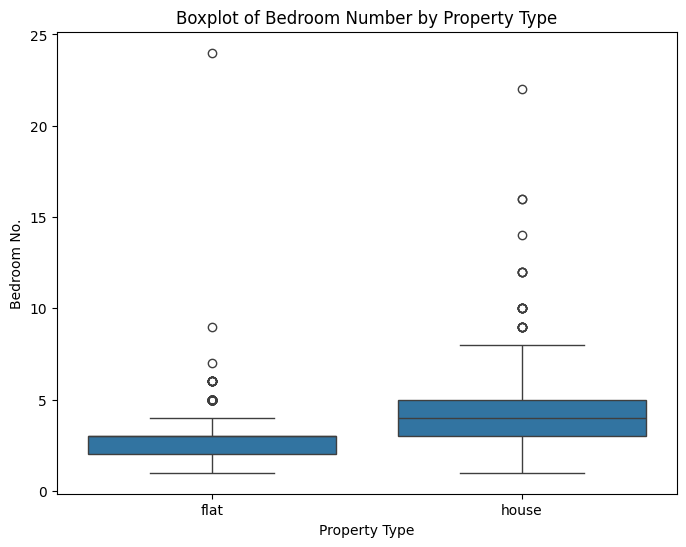

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='PROPERTY_TYPE', y='BEDROOM_NUM', data=df)
plt.title('Boxplot of Bedroom Number by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Bedroom No.')
plt.show()

In [22]:
df[df['BEDROOM_NUM']>=10].shape

(16, 25)

In [23]:
df.shape

(6580, 25)

In [24]:
df = df[df['BEDROOM_NUM'] <= 10]

In [25]:
df.shape

(6567, 25)

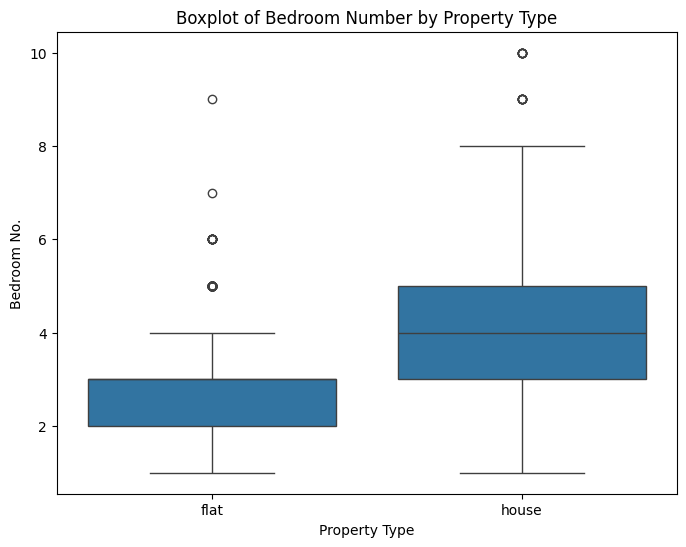

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='PROPERTY_TYPE', y='BEDROOM_NUM', data=df)
plt.title('Boxplot of Bedroom Number by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Bedroom No.')
plt.show()

In [27]:
df.sample(1)

,PROP_ID,DESCRIPTION,PROPERTY_TYPE,CITY,BEDROOM_NUM,PRICE_PER_UNIT_AREA,FURNISH,FACING,AGE,TOTAL_FLOOR,FEATURES,PROP_NAME,MAP_DETAILS,AMENITIES,AREA,PRICE,PROP_HEADING,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS,SOCIETY_NAME,BUILDING_NAME,location,BALCONY_NUM,FLOOR_NUM
5517,C71313162,Check out this 3 bhk apartment for sale in the...,flat,Kolkata South,3.00,6100.00,Fully furnished,2,5,11.00,"33,12,23,24,25,47,26,17,28,29,19,1,2,3,5,6,9,4...",The Avalone heights,"{'LATITUDE': '88.35469', 'LONGITUDE': '22.5360...","17,2,5,20,21,32,23,24,47,28,29,19,1,6,9,40,41,...",1195 sq.ft.,72.89 L,3 BHK Flat in Hindustan More,"['UNDER CONSTRUCTION', 'RESALE']",NaN,NaN,The Avalone heights,The Avalone heights,"{'CITY': '27', 'CITY_NAME': 'Kolkata South', '...",1.00,5


In [28]:
df = df[df['PRICE_PER_UNIT_AREA']>= 2000]

In [29]:
df[df['PRICE_PER_UNIT_AREA']== 120000000.00]

,PROP_ID,DESCRIPTION,PROPERTY_TYPE,CITY,BEDROOM_NUM,PRICE_PER_UNIT_AREA,FURNISH,FACING,AGE,TOTAL_FLOOR,FEATURES,PROP_NAME,MAP_DETAILS,AMENITIES,AREA,PRICE,PROP_HEADING,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS,SOCIETY_NAME,BUILDING_NAME,location,BALCONY_NUM,FLOOR_NUM
3292,J70479080,Are you planning to buy your dream home? You c...,house,Kolkata North,6.00,120000000.00,Unfurnished,0,1,3.00,"24,25,26",NaN,"{'LATITUDE': '22.59131', 'LONGITUDE': '88.42342'}","24,25,26",3599 sq.ft.,60 Cr,6 Bedroom House in Sector 2 Salt Lake,"['READY TO MOVE', 'RESALE']",49.00,"[{'category': 'MetroStation', 'text': '3 Metro...",NaN,NaN,"{'CITY': '26', 'CITY_NAME': 'Kolkata North', '...",2.00,NaN


In [30]:
df = df[df['PRICE_PER_UNIT_AREA']!= 120000000.00]

In [31]:
df['PRICE_PER_UNIT_AREA'].describe()

count       6523.00
mean       66832.53
std       821333.08
min         2000.00
25%         4047.00
50%         5514.00
75%         7944.00
max     20000000.00
Name: PRICE_PER_UNIT_AREA, dtype: float64

In [32]:
df['PRICE']

0        19.1 L Onwards
1       1.17  - 1.18 Cr
2       1.22  - 1.35 Cr
4            60  - 75 L
5            45  - 49 L
             ...       
8786             5.3 Cr
8788             1.8 Cr
8791            1.55 Cr
8792            1.75 Cr
8793               74 L
Name: PRICE, Length: 6523, dtype: object

In [33]:
df.shape

(6523, 25)

In [34]:

df['AREA'] = df['AREA'].astype(str)

df = df[~df['AREA'].str.contains('-')]


In [35]:

df['PRICE'] = df['PRICE'].astype(str)

df = df[~df['PRICE'].str.contains('-')]

In [36]:
import numpy as np

def convert_to_cr(price_str):
    price_str = price_str.strip()


    # Handle individual values
    if 'Cr' in price_str:
        return float(price_str.replace('Cr', '').replace('Onwards', '').strip())
    elif 'L' in price_str:
        return float(price_str.replace('L', '').replace('Onwards', '').strip()) / 100
    else:
        # Handle unexpected formats
        return np.nan

# Apply the function to the price column
df['Price'] = df['PRICE'].apply(convert_to_cr)


In [37]:
df.drop(columns='PRICE', inplace = True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5384 entries, 7 to 8793
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PROP_ID                     5384 non-null   object 
 1   DESCRIPTION                 5384 non-null   object 
 2   PROPERTY_TYPE               5384 non-null   object 
 3   CITY                        5384 non-null   object 
 4   BEDROOM_NUM                 5384 non-null   float64
 5   PRICE_PER_UNIT_AREA         5384 non-null   float64
 6   FURNISH                     5384 non-null   object 
 7   FACING                      5384 non-null   int64  
 8   AGE                         5384 non-null   int64  
 9   TOTAL_FLOOR                 5384 non-null   float64
 10  FEATURES                    5384 non-null   object 
 11  PROP_NAME                   5217 non-null   object 
 12  MAP_DETAILS                 5384 non-null   object 
 13  AMENITIES                   4679 non-n

In [39]:
problem = df[df['PRICE_PER_UNIT_AREA']> 15000]

In [40]:
#problem[[ 'PROP_ID','PROPERTY_TYPE','BEDROOM_NUM','PRICE_PER_UNIT_AREA','TOTAL_FLOOR','AREA','Price','BALCONY_NUM','FLOOR_NUM']].sort_values(by='PRICE_PER_UNIT_AREA', ascending=False)

In [41]:
problem.shape

(225, 25)

In [42]:
df['AREA'] = df['AREA'].apply(lambda x: x.split()[0])

In [43]:
df[df['PRICE_PER_UNIT_AREA']> 15000].shape

(225, 25)

In [44]:
#problem[[ 'PROP_ID','PROPERTY_TYPE','BEDROOM_NUM','PRICE_PER_UNIT_AREA','TOTAL_FLOOR','AREA','Price','BALCONY_NUM','FLOOR_NUM']].sort_values(by='PRICE_PER_UNIT_AREA', ascending=False)

In [45]:
df['AREA']

7        920
13      1560
16       535
18      1940
20       910
        ... 
8786    3528
8788    2000
8791    1843
8792    2079
8793    1257
Name: AREA, Length: 5384, dtype: object

In [46]:
df['AREA'] = pd.to_numeric(df['AREA'], errors='coerce')


def transform(row):
    if row['PROPERTY_TYPE'] == 'house':
        if row['AREA'] > 0 and row['TOTAL_FLOOR'] > 0:
            return (row['Price'] * 10000) / (row['AREA'] * row['TOTAL_FLOOR'])
        else:
            return None  
    else:
        return row['PRICE_PER_UNIT_AREA']

# Apply the function to each row
df['PRICE_PER_UNIT_AREA_2'] = df.apply(transform, axis=1)


In [47]:
df[df['PRICE_PER_UNIT_AREA']> 15000].shape

(225, 26)

In [48]:
df.drop(columns='PRICE_PER_UNIT_AREA', inplace = True)

In [49]:
df[df['TOTAL_FLOOR'] > 42].shape

(26, 25)

In [50]:
# Kolkata tallest residence is "The-42"
df = df[df['TOTAL_FLOOR']<= 42]

In [51]:
problem = df[df['PRICE_PER_UNIT_AREA_2']> 25000]

In [52]:
df[df['PRICE_PER_UNIT_AREA_2']> 25000].shape

(18, 25)

In [53]:
problem[[ 'PROP_ID','PROPERTY_TYPE','BEDROOM_NUM','PRICE_PER_UNIT_AREA_2','TOTAL_FLOOR','AREA','Price','BALCONY_NUM','FLOOR_NUM']].sort_values(by='PRICE_PER_UNIT_AREA_2', ascending=False)

,PROP_ID,PROPERTY_TYPE,BEDROOM_NUM,PRICE_PER_UNIT_AREA_2,TOTAL_FLOOR,AREA,Price,BALCONY_NUM,FLOOR_NUM
4793,L71093478,flat,3.00,57333.00,4.00,150,0.86,2.00,2
6476,M62242080,flat,3.00,45454.00,4.00,1760,8.00,1.00,2
2638,C70089006,flat,4.00,40935.00,21.00,3927,10.50,3.00,18
4222,E70628340,flat,5.00,36250.00,21.00,5600,14.50,2.00,14
8501,N59959644,flat,5.00,35722.00,37.00,9238,33.00,2.00,20
261,Y70504448,flat,4.00,34104.00,16.00,2938,10.02,2.00,3
8512,S35183221,flat,4.00,31666.00,39.00,6000,NaN,1.00,10
6489,A71310442,flat,2.00,30991.00,3.00,908,2.81,1.00,2
8504,Q69546562,flat,5.00,30769.00,26.00,6500,20.00,3.00,5
6615,S69589860,flat,4.00,30232.00,16.00,4300,13.00,1.00,7


In [54]:
# [4793, 50, 6476, 6489, 6489,3451]

In [55]:
df = df.drop(index=[4793, 50, 6476, 6489, 6489,3451], errors='ignore')

In [56]:
problem = df[df['PRICE_PER_UNIT_AREA_2']> 25000]

In [57]:
problem[[ 'PROP_ID','PROPERTY_TYPE','BEDROOM_NUM','PRICE_PER_UNIT_AREA_2','TOTAL_FLOOR','AREA','Price','BALCONY_NUM','FLOOR_NUM']].sort_values(by='PRICE_PER_UNIT_AREA_2', ascending=False)

,PROP_ID,PROPERTY_TYPE,BEDROOM_NUM,PRICE_PER_UNIT_AREA_2,TOTAL_FLOOR,AREA,Price,BALCONY_NUM,FLOOR_NUM
2638,C70089006,flat,4.00,40935.00,21.00,3927,10.50,3.00,18
4222,E70628340,flat,5.00,36250.00,21.00,5600,14.50,2.00,14
8501,N59959644,flat,5.00,35722.00,37.00,9238,33.00,2.00,20
261,Y70504448,flat,4.00,34104.00,16.00,2938,10.02,2.00,3
8512,S35183221,flat,4.00,31666.00,39.00,6000,NaN,1.00,10
8504,Q69546562,flat,5.00,30769.00,26.00,6500,20.00,3.00,5
6615,S69589860,flat,4.00,30232.00,16.00,4300,13.00,1.00,7
6614,U69590414,flat,4.00,30063.00,33.00,3160,9.50,1.00,9
8507,F57995372,flat,3.00,29222.00,42.00,1711,5.00,1.00,8
8508,J57995508,flat,4.00,28710.00,42.00,2783,7.99,2.00,16


In [58]:
df.head()

,PROP_ID,DESCRIPTION,PROPERTY_TYPE,CITY,BEDROOM_NUM,FURNISH,FACING,AGE,TOTAL_FLOOR,FEATURES,PROP_NAME,MAP_DETAILS,AMENITIES,AREA,PROP_HEADING,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS,SOCIETY_NAME,BUILDING_NAME,location,BALCONY_NUM,FLOOR_NUM,Price,PRICE_PER_UNIT_AREA_2
7,J71214794,Experience a new style of living with Bhawani ...,flat,Kolkata North,2.00,Unfurnished,0,5,11.00,N,Bhawani Bandhan,"{'LATITUDE': '22.690003', 'LONGITUDE': '88.459...",NaN,920,2 BHK Flat in Madhyamgram,"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA | ...",27.00,"[{'category': 'ReligiousPlace', 'text': '5 Rel...",Bhawani Bandhan,Bhawani Bandhan,"{'CITY': '26', 'CITY_NAME': 'Kolkata North', '...",NaN,1,0.39,4239.00
13,W69843582,"Eden spring villas is located in joka, kolkata...",house,Kolkata South,3.00,Unfurnished,0,5,0.00,N,Eden Spring Villas,"{'LATITUDE': '22.44731', 'LONGITUDE': '88.31051'}",NaN,1560,3 Bedroom House in Joka,"['UNDER CONSTRUCTION', 'NEW LAUNCH', 'NEW BOOK...",13.00,"[{'category': 'MetroStation', 'text': '1 Metro...",Eden Spring Villas,Eden Spring Villas,"{'CITY': '27', 'CITY_NAME': 'Kolkata South', '...",NaN,NaN,0.80,NaN
16,F70835394,Let your dream of owning a flat come true with...,flat,Kolkata South,1.00,Unfurnished,0,5,7.00,N,Ganguly 4Sight Desire,"{'LATITUDE': '22.46878', 'LONGITUDE': '88.38072'}",NaN,535,1 BHK Flat in Garia,"['UNDER CONSTRUCTION', 'NEW BOOKING']",50.00,"[{'category': 'MetroStation', 'text': '3 Metro...",Ganguly 4Sight Desire,Ganguly 4Sight Desire,"{'CITY': '27', 'CITY_NAME': 'Kolkata South', '...",NaN,1,0.27,5100.00
18,P69854924,"Book your 4 BHK apartment in DTC Capital City,...",flat,Kolkata East,4.00,Unfurnished,0,5,20.00,N,DTC Capital City,"{'LATITUDE': '22.562087130058', 'LONGITUDE': '...",NaN,1940,4 BHK Flat in Rajarhat,"['UNDER CONSTRUCTION', 'NEW LAUNCH', 'NEW BOOK...",6.00,"[{'category': 'Shopping', 'text': '1 Shopping'...",DTC Capital City,DTC Capital City,"{'CITY': '28', 'CITY_NAME': 'Kolkata East', 'L...",NaN,1,0.92,4742.00
20,E69854912,Make DTC Capital City your next home. Book you...,flat,Kolkata East,2.00,Unfurnished,0,5,20.00,N,DTC Capital City,"{'LATITUDE': '22.562087130058', 'LONGITUDE': '...",NaN,910,2 BHK Flat in Rajarhat,"['UNDER CONSTRUCTION', 'NEW LAUNCH', 'NEW BOOK...",6.00,"[{'category': 'Shopping', 'text': '1 Shopping'...",DTC Capital City,DTC Capital City,"{'CITY': '28', 'CITY_NAME': 'Kolkata East', 'L...",NaN,1,0.42,4615.00


In [59]:
df.rename(columns={'PRICE_PER_UNIT_AREA_2': 'Price_per_sqft'}, inplace=True)

In [60]:
df.head(1)

,PROP_ID,DESCRIPTION,PROPERTY_TYPE,CITY,BEDROOM_NUM,FURNISH,FACING,AGE,TOTAL_FLOOR,FEATURES,PROP_NAME,MAP_DETAILS,AMENITIES,AREA,PROP_HEADING,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS,SOCIETY_NAME,BUILDING_NAME,location,BALCONY_NUM,FLOOR_NUM,Price,Price_per_sqft
7,J71214794,Experience a new style of living with Bhawani ...,flat,Kolkata North,2.00,Unfurnished,0,5,11.00,N,Bhawani Bandhan,"{'LATITUDE': '22.690003', 'LONGITUDE': '88.459...",NaN,920,2 BHK Flat in Madhyamgram,"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA | ...",27.00,"[{'category': 'ReligiousPlace', 'text': '5 Rel...",Bhawani Bandhan,Bhawani Bandhan,"{'CITY': '26', 'CITY_NAME': 'Kolkata North', '...",NaN,1,0.39,4239.00


In [61]:
df.columns

Index(['PROP_ID', 'DESCRIPTION', 'PROPERTY_TYPE', 'CITY', 'BEDROOM_NUM',
       'FURNISH', 'FACING', 'AGE', 'TOTAL_FLOOR', 'FEATURES', 'PROP_NAME',
       'MAP_DETAILS', 'AMENITIES', 'AREA', 'PROP_HEADING', 'SECONDARY_TAGS',
       'TOTAL_LANDMARK_COUNT', 'FORMATTED_LANDMARK_DETAILS', 'SOCIETY_NAME',
       'BUILDING_NAME', 'location', 'BALCONY_NUM', 'FLOOR_NUM', 'Price',
       'Price_per_sqft'],
      dtype='object')

In [62]:
new_order = [
    'PROP_ID', 'DESCRIPTION', 'PROPERTY_TYPE', 'CITY', 'BEDROOM_NUM',
    'BALCONY_NUM','AREA', 'Price_per_sqft', 'FURNISH', 'FACING', 'AGE', 'TOTAL_FLOOR', 'FEATURES',
    'PROP_NAME', 'MAP_DETAILS', 'AMENITIES', 
    'PROP_HEADING', 'SECONDARY_TAGS', 'TOTAL_LANDMARK_COUNT',
    'FORMATTED_LANDMARK_DETAILS', 'SOCIETY_NAME', 'BUILDING_NAME', 'location',
    'FLOOR_NUM', 'Price'
]

df = df[new_order]
df.head(1)

,PROP_ID,DESCRIPTION,PROPERTY_TYPE,CITY,BEDROOM_NUM,BALCONY_NUM,AREA,Price_per_sqft,FURNISH,FACING,AGE,TOTAL_FLOOR,FEATURES,PROP_NAME,MAP_DETAILS,AMENITIES,PROP_HEADING,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS,SOCIETY_NAME,BUILDING_NAME,location,FLOOR_NUM,Price
7,J71214794,Experience a new style of living with Bhawani ...,flat,Kolkata North,2.00,NaN,920,4239.00,Unfurnished,0,5,11.00,N,Bhawani Bandhan,"{'LATITUDE': '22.690003', 'LONGITUDE': '88.459...",NaN,2 BHK Flat in Madhyamgram,"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA | ...",27.00,"[{'category': 'ReligiousPlace', 'text': '5 Rel...",Bhawani Bandhan,Bhawani Bandhan,"{'CITY': '26', 'CITY_NAME': 'Kolkata North', '...",1,0.39


In [63]:
df.shape

(5354, 25)

In [64]:
# df.to_csv('cleaned_dataset_v2.csv', index=False)

In [65]:
df['PROPERTY_TYPE'].value_counts()

PROPERTY_TYPE
flat     5165
house     189
Name: count, dtype: int64